# Video - Mean Smoothing a Time-Series

### Running-Mean time series filter

### 2 Option to take care of edge affects
#### 1) make the edges equal to the first and last original points
#### 2) Ignore them - crop off 1st and last signal points from the filtered data

In [2]:
import numpy as np
import matplotlib.pyplot as mplt
import scipy.io as sio
import scipy.signal
from scipy import *
import copy
#from random import random as rand

In [3]:
# Creating the initial signal
srate = 1000; # treating it in hertz
time = np.arange(0,3,1/srate)
n = len(time)
p = 15 # the numb of poles for random interpolation

# Noise level; measured in standard deviations
noiseamp = 5

# Amplitutde Modulator and noise level
ampl = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30 )
noise = noiseamp * np.random.rand(n)
signal = ampl + noise

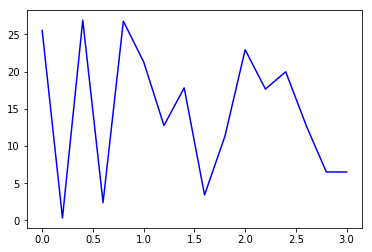

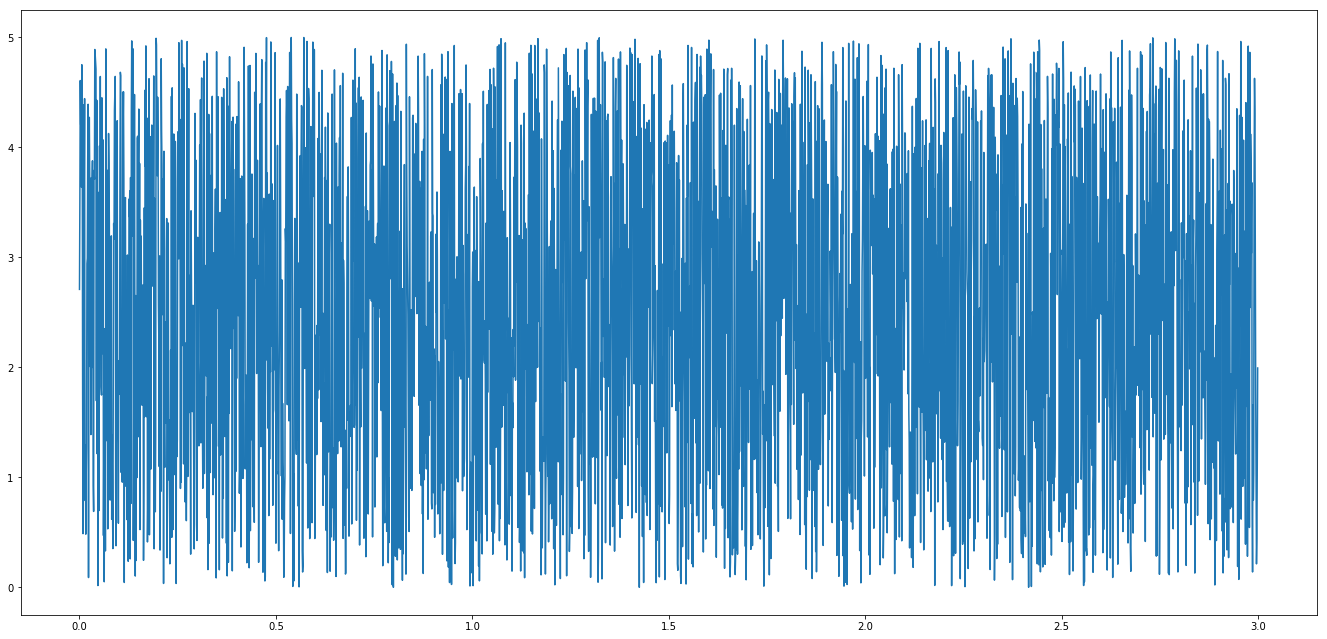

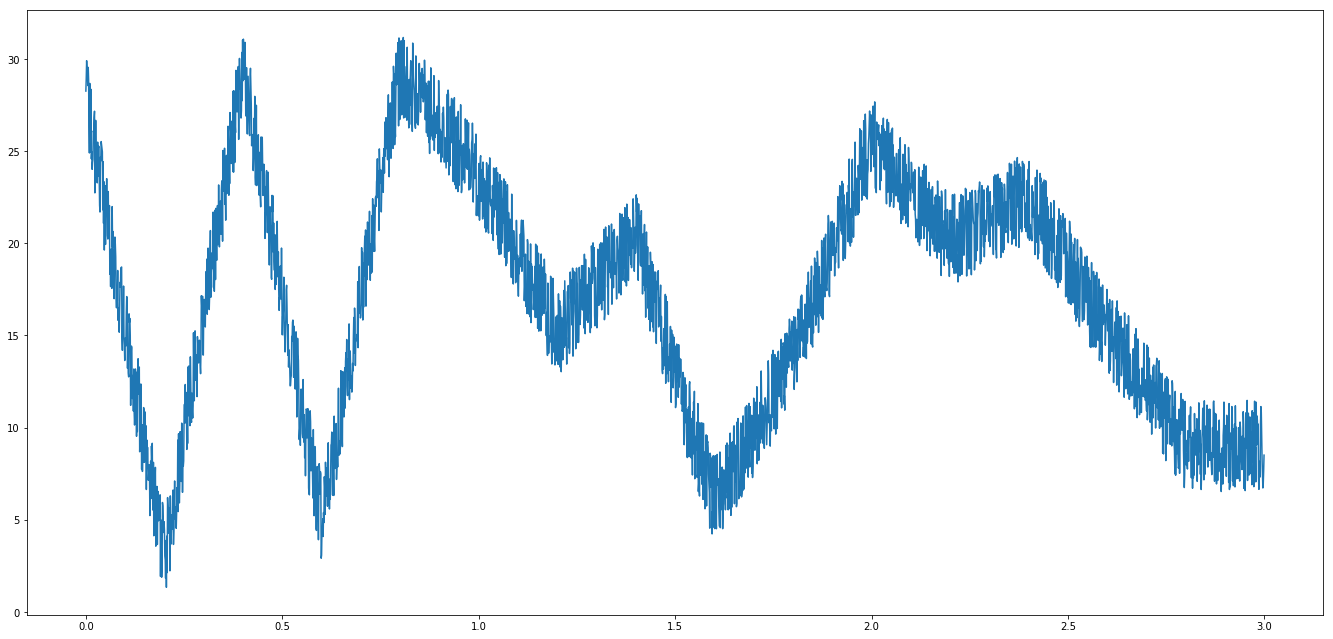

In [4]:
# plot of the OG signal
fig = mplt.figure()
fig2 = mplt.figure()
fig3 = mplt.figure()
fig.add_axes()
ax = fig.add_subplot(111)
ay = fig2.add_subplot(111)
an = fig3.add_subplot(111)

#ay.axis('equal')
fig2.subplots_adjust(wspace=10,hspace=0.3,left=3,right=6,top=3,bottom=.9)
fig3.subplots_adjust(wspace=10,hspace=0.3,left=3,right=6,top=3,bottom=.9)


ax.plot(time,ampl,color='blue')
ay.plot(time,noise)
an.plot(time,signal)

mplt.show()

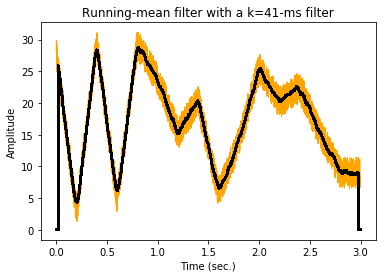

In [12]:
# Initializing the filtered signal vector  - using a zeros, so zeros will be the edges
filtsig = np.zeros((len(signal),len(signal))) # he used np.zeros(n)... len(signal) = 3000 = len(n) = n = len(time)

# Implementing the running mean filter in the Time Domain by convolution
k = 20 # filter window is actually k*2+1
# k = 40

for i in range(k+1,n-k+1): # I think range arg should end at n-k, since range only uses one before end arg as end point
    filtsig[i] = np.mean(signal[i-k:i+k])     # TRY: filtsig = np.sum(np.multiply(signal,filtsig))
                         
# Compute the window size in microsecs
windsize = 1000 * (k*2+1) / srate

#Plotting filtered signal   & orginal noisy    2 On the Same plot                
mplt.plot(time,signal,label='OG noise',linewidth=1.0,color='orange')
mplt.plot(time,filtsig,label='Filtered',linewidth=2.0,color='black')

#mplt.legend(loc = 'best') --- keeps adding every point of filtsigG to the legend
mplt.xlabel('Time (sec.)')
mplt.ylabel('Amplitude')
mplt.title('Running-mean filter with a k=%d-ms filter' %windsize)

mplt.show()